## 交叉熵理解

详细见obsidian的pytorch的总结

In [3]:
from sklearn.metrics import log_loss
import math

y_true=[[0,1],[1,0]] # 样本中的真实值
y_pred=[[0.3,0.7],[0.8,0.2]] # 模型预测值
print(log_loss(y_true[1], y_pred[1])) # 真实概率分布和预测概率分布的差异

# 输出：0.2899092476264711

# 按照例子中的数据，预期的输出值
print((math.log(0.7) + math.log(0.8))/2) 
# 输出 -0.2899092476264711

0.2231435513142097
-0.2899092476264711


In [4]:
import torch
import torch.nn as nn
x_input=torch.randn(3,3)#随机生成输入 
print('x_input:\n',x_input) 
y_target=torch.tensor([1,2,0])#设置输出具体值 print('y_target\n',y_target)

#计算输入softmax，此时可以看到每一行加到一起结果都是1
softmax_func=nn.Softmax(dim=0)
soft_output=softmax_func(x_input)
print('soft_output:\n',soft_output)

#在softmax的基础上取log
log_output=torch.log(soft_output)
print('log_output:\n',log_output)

#对比softmax与log的结合与nn.LogSoftmaxloss(负对数似然损失)的输出结果，发现两者是一致的。
logsoftmax_func=nn.LogSoftmax(dim=1)
logsoftmax_output=logsoftmax_func(x_input)
print('logsoftmax_output:\n',logsoftmax_output)

#pytorch中关于NLLLoss的默认参数配置为：reducetion=True、size_average=True
nllloss_func=nn.NLLLoss()
nlloss_output=nllloss_func(logsoftmax_output,y_target)
print('nlloss_output:\n',nlloss_output)

#直接使用pytorch中的loss_func=nn.CrossEntropyLoss()看与经过NLLLoss的计算是不是一样
crossentropyloss=nn.CrossEntropyLoss()
crossentropyloss_output=crossentropyloss(x_input,y_target)
print('crossentropyloss_output:\n',crossentropyloss_output)

x_input:
 tensor([[-0.5622, -0.3327, -1.6405],
        [-0.0181,  0.3684,  0.5664],
        [-0.1474, -0.3206, -1.3407]])
soft_output:
 tensor([[0.2360, 0.2483, 0.0874],
        [0.4067, 0.5005, 0.7946],
        [0.3573, 0.2513, 0.1180]])
log_output:
 tensor([[-1.4439, -1.3933, -2.4368],
        [-0.8998, -0.6922, -0.2300],
        [-1.0291, -1.3812, -2.1370]])
logsoftmax_output:
 tensor([[-0.9548, -0.7253, -2.0331],
        [-1.4506, -1.0642, -0.8662],
        [-0.7628, -0.9360, -1.9560]])
nlloss_output:
 tensor(0.7848)
crossentropyloss_output:
 tensor(0.7848)


## Logistic Regression 实现

In [5]:
import torch
import torch.nn.functional as F
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

# 损失函数
criterion = torch.nn.BCELoss(size_average=False)
# 优化器
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# 训练
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(f'epoch: {epoch} , loss: {loss.item():.4f}')
    # 梯度清零
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()


epoch: 0 , loss: 2.2890
epoch: 1 , loss: 2.2848
epoch: 2 , loss: 2.2807
epoch: 3 , loss: 2.2767
epoch: 4 , loss: 2.2728
epoch: 5 , loss: 2.2691
epoch: 6 , loss: 2.2654
epoch: 7 , loss: 2.2619
epoch: 8 , loss: 2.2585
epoch: 9 , loss: 2.2551
epoch: 10 , loss: 2.2518
epoch: 11 , loss: 2.2486
epoch: 12 , loss: 2.2455
epoch: 13 , loss: 2.2424
epoch: 14 , loss: 2.2394
epoch: 15 , loss: 2.2364
epoch: 16 , loss: 2.2335
epoch: 17 , loss: 2.2306
epoch: 18 , loss: 2.2278
epoch: 19 , loss: 2.2250
epoch: 20 , loss: 2.2223
epoch: 21 , loss: 2.2196
epoch: 22 , loss: 2.2169
epoch: 23 , loss: 2.2142
epoch: 24 , loss: 2.2116
epoch: 25 , loss: 2.2090
epoch: 26 , loss: 2.2065
epoch: 27 , loss: 2.2039
epoch: 28 , loss: 2.2014
epoch: 29 , loss: 2.1989
epoch: 30 , loss: 2.1964
epoch: 31 , loss: 2.1939
epoch: 32 , loss: 2.1915
epoch: 33 , loss: 2.1891
epoch: 34 , loss: 2.1866
epoch: 35 , loss: 2.1842
epoch: 36 , loss: 2.1818
epoch: 37 , loss: 2.1795
epoch: 38 , loss: 2.1771
epoch: 39 , loss: 2.1747
epoch: 40 

e:\program\Anaconda\envs\deepLearning\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch: 672 , loss: 1.3000
epoch: 673 , loss: 1.2992
epoch: 674 , loss: 1.2984
epoch: 675 , loss: 1.2977
epoch: 676 , loss: 1.2969
epoch: 677 , loss: 1.2961
epoch: 678 , loss: 1.2953
epoch: 679 , loss: 1.2945
epoch: 680 , loss: 1.2937
epoch: 681 , loss: 1.2929
epoch: 682 , loss: 1.2921
epoch: 683 , loss: 1.2913
epoch: 684 , loss: 1.2905
epoch: 685 , loss: 1.2898
epoch: 686 , loss: 1.2890
epoch: 687 , loss: 1.2882
epoch: 688 , loss: 1.2874
epoch: 689 , loss: 1.2866
epoch: 690 , loss: 1.2859
epoch: 691 , loss: 1.2851
epoch: 692 , loss: 1.2843
epoch: 693 , loss: 1.2835
epoch: 694 , loss: 1.2828
epoch: 695 , loss: 1.2820
epoch: 696 , loss: 1.2812
epoch: 697 , loss: 1.2804
epoch: 698 , loss: 1.2797
epoch: 699 , loss: 1.2789
epoch: 700 , loss: 1.2781
epoch: 701 , loss: 1.2774
epoch: 702 , loss: 1.2766
epoch: 703 , loss: 1.2758
epoch: 704 , loss: 1.2751
epoch: 705 , loss: 1.2743
epoch: 706 , loss: 1.2736
epoch: 707 , loss: 1.2728
epoch: 708 , loss: 1.2720
epoch: 709 , loss: 1.2713
epoch: 710 ,

### 画Logistic图

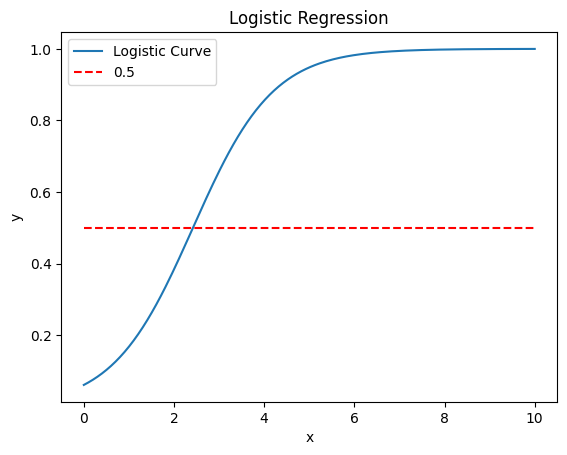

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# linspace包括10，arange不包括10

x = np.linspace(0, 10, 200)
x_t =torch.Tensor(x).view((200,1))
y_t = model(x_t)

# 转换为numpy数组
y_t = y_t.data.numpy()


# 绘制Logistic曲线
plt.plot(x, y_t, label='Logistic Curve')
# 绘制 0.5
plt.plot([0, 10], [0.5, 0.5], 'r--', label='0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.legend()
plt.show()
